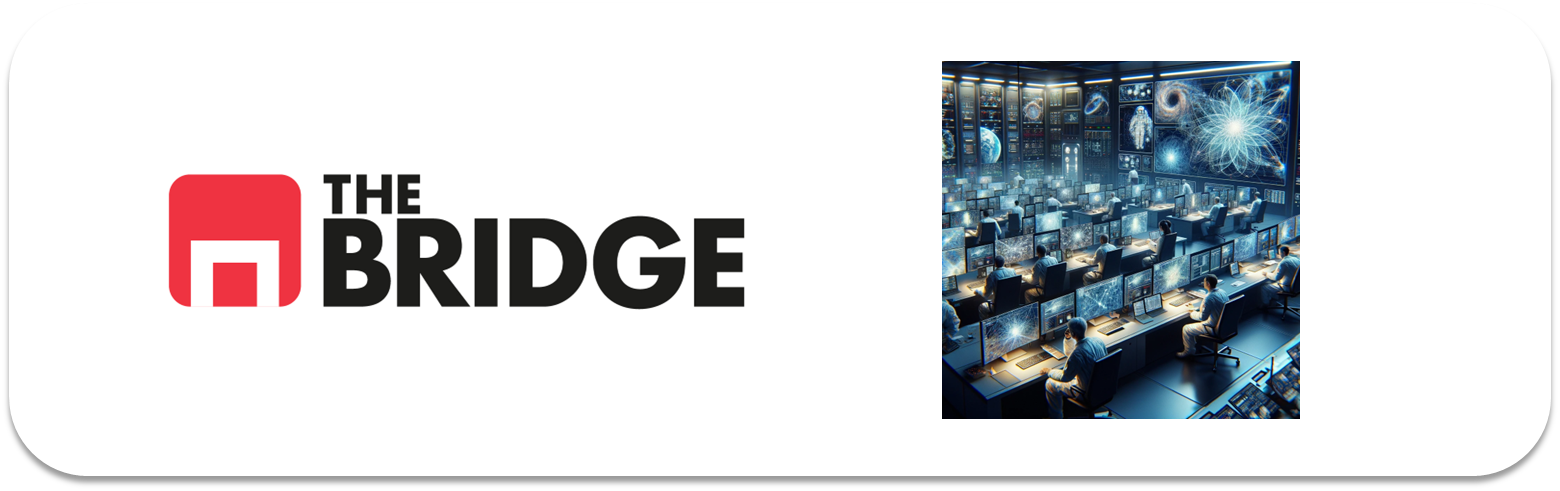

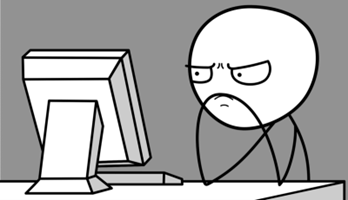

Para ejercitarte y afianzar lo aprendido sobre **Redes Convolucionales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import cv2
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## El problema de "Negocio"
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en https://www.kaggle.com/datasets/puneet6060/intel-image-classification?select=seg_test como `seg_train.zip` y `seg_test.zip` (o bien en el botón de download).  

NOTA: Son archivos bastante grandes (386MB en total). Por supuesto, no es necesario que tengas que mantenerlos en tu ordenador una vez realizado el ejercicio, bórralos si es el caso.




### Ejercicio 1

Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones). Para ello:

1. Descarga las imagenes del repositorio de Kaggle en el directorio que vayas a emplear para el ejercicio.
2. Descomprime los datos (son ficheros de imágenes) de forma que tengas dos subdirectorios seg_train y seg_test en el que estén ya colgando directamente los directorios de cada clase de paisajes. Si descargaste seg_pred, puedes eliminarlo.
3. Crea unas variables como las siguientes (ajustándolas a tu caso/rutas particulares):

```python
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"
```
4. Utiliza la siguiente función para crear los X_train, y_train y X_test e y_test:

```python
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)
```


In [2]:
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

In [3]:
def read_data(directorio, reshape_dim = (32,32)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [4]:
X_train,y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

buildings
forest
glacier
mountain
sea
street
buildings
forest
glacier
mountain
sea
street


### Ejercicio 2

Haz la visualización del dataset: comprueba cuantos datos tienes, que forma, investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.


In [5]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)

X train shape:  (14034, 32, 32, 3)
Y train shape:  (14034,)


14034 imagenes de 32x32 con 3 canales para los colores en el train

In [6]:
print('X train shape: ', X_test.shape)
print('Y train shape: ', y_test.shape)

X train shape:  (3000, 32, 32, 3)
Y train shape:  (3000,)


3000 imagenes con 3 canales para los colores en el test

Visualizamos las imagenes

In [7]:
def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

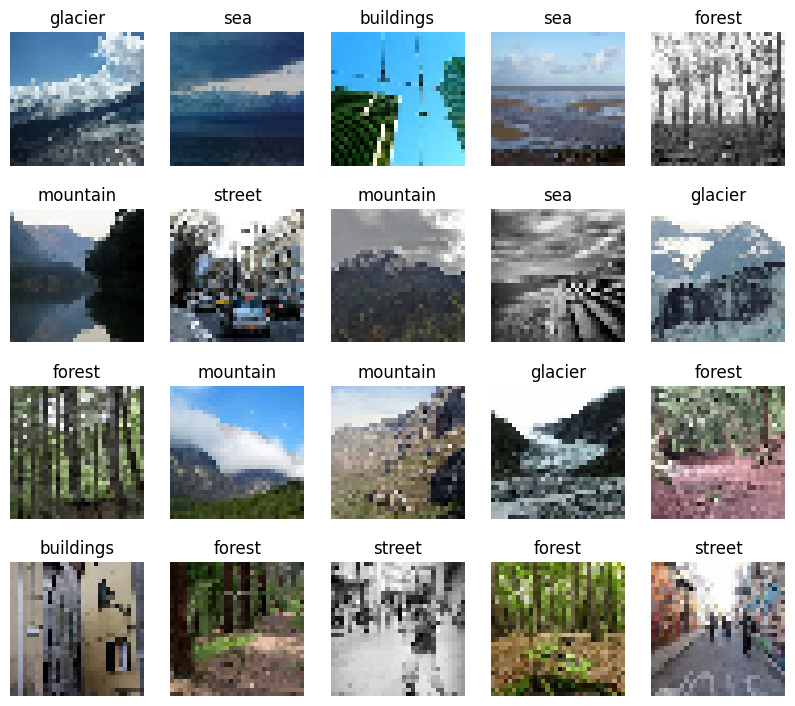

In [8]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

La disminucion en la resolución afecta. Se podría aumentar a costa de aumentar el tiempo de computación

### Ejercicio 3

Ahora haz un pequeño miniEda y normaliza las features



In [9]:
targets = pd.Series(y_train)
targets.value_counts(True)

mountain     0.178994
glacier      0.171298
street       0.169731
sea          0.162035
forest       0.161821
buildings    0.156121
Name: proportion, dtype: float64

Hay 6 clases posibles que están más o menos balanceadas aunque hay una ligera superioridad de muestra de paisajes de montaña respecto al de edificios

Normalizamos la imágenes

In [10]:
X_train = X_train/255
X_test = X_test/255

### Ejercicio 4

Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada. Como guía, copia o parte de la arquitectura del workout (un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer)


In [11]:
# Creamos el modelo
model = keras.Sequential()

# Definimos las capas de la red, en este caso partimos de 30 filtros de 3x3, seguido de una capa de pooling de 2x2,
# El input shape es el tamaño de las imágenes de entrada, en nuestro caso 32x32x3.
# El tamaño del kernel es pequeño pero suele ser de este tipo y más con resoluciones tan bajas, el número de filtros está escogido aleatoriamente

# Primera capa convolucional y su pooling
model.add(keras.layers.Conv2D(filters = 30, kernel_size = (3, 3), input_shape = (X_train[0].shape), padding = "same", activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Segunda capa convolucional y su pooling
model.add(keras.layers.Conv2D(filters = 15, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
model.add(keras.layers.Flatten())

# Primera capa densa
model.add(keras.layers.Dense(units = 150, activation = 'relu'))

# Segunda capa densa
model.add(keras.layers.Dense(units = 100, activation = 'relu'))

# Capa de salida con 6 neuronas, una por cada clase
model.add(keras.layers.Dense(6, activation = 'softmax'))

### Ejercicio 5

Escoge el resto de hiperparámetros (optimizador, learning_rate, función de pérdida, métrica,...) y compila el modelo. Muestra un resumen del mismo

Para escoger el optimizador nos fijamos en el tamaño del dataset

In [12]:
X_train.size

43112448

Dado el tamaño usaremos un adam, cuyos hiperparámetros por defecto suelen funcionar bastante bien. Como el target es unidimensional usararemos *sparse_categorical* y como métrica, dado el balanceo, el *accuracy*

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

Resumen del modelo:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 150)               1

### Ejercicio 6

Entrena el modelo reservando un 20% de los datos del entrenamiento para validar y con los callbacks que creas necesarios. NOTA: Ojo, tendrás que preparar un poco los X,y antes.



Convertimos el *target* a ordinal

In [15]:
mapeo = {tipo:indice for indice,tipo in enumerate(targets.unique())}
mapeo

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [16]:
y_train_num = np.array([mapeo[y] for y in y_train])
y_test_num = np.array([mapeo[y] for y in y_test])

Los datos están ordenados por lo que debemos hacer un *shuffle* para que el modelo no aprenda el orden de las imágenes

In [17]:
X_train, y_train_num = shuffle(X_train, y_train_num)

Entrenamos el modelo

In [18]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 32, callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)]) # Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience

Epoch 1/100


351/351 [==============================] - 5s 11ms/step - loss: 1.1014 - accuracy: 0.5585 - val_loss: 0.9438 - val_accuracy: 0.6470
Epoch 2/100
351/351 [==============================] - 4s 10ms/step - loss: 0.8491 - accuracy: 0.6820 - val_loss: 0.8314 - val_accuracy: 0.6933
Epoch 3/100
351/351 [==============================] - 3s 10ms/step - loss: 0.7250 - accuracy: 0.7329 - val_loss: 0.7054 - val_accuracy: 0.7471
Epoch 4/100
351/351 [==============================] - 3s 10ms/step - loss: 0.6490 - accuracy: 0.7626 - val_loss: 0.7208 - val_accuracy: 0.7421
Epoch 5/100
351/351 [==============================] - 3s 10ms/step - loss: 0.5757 - accuracy: 0.7944 - val_loss: 0.6788 - val_accuracy: 0.7496
Epoch 6/100
351/351 [==============================] - 4s 10ms/step - loss: 0.5277 - accuracy: 0.8100 - val_loss: 0.6894 - val_accuracy: 0.7613
Epoch 7/100
351/351 [==============================] - 4s 10ms/step - loss: 0.4811 - accuracy: 0.8242 - val_loss: 0.6614 - val_accurac


### Ejercicio 7

Representa el objeto history y comenta la evolución de tu entrenamiento.



In [21]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.101413,0.558475,0.943803,0.646954
1,0.849149,0.682017,0.831442,0.693267
2,0.724972,0.732876,0.705395,0.747061
3,0.649010,0.762626,0.720848,0.742073
4,0.575733,0.794424,0.678807,0.749555
5,0.527723,0.810012,0.689445,0.761311
6,0.481081,0.824174,0.661386,0.772711
7,0.428262,0.847778,0.758447,0.744211
8,0.385692,0.863009,0.675966,0.760598
9,0.337230,0.876726,0.761797,0.754542


Observamos la evolución de la métrica

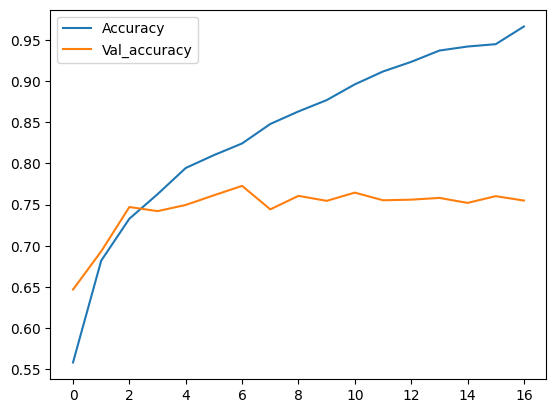

In [22]:
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

Observamos la evolución de la función de pérdida

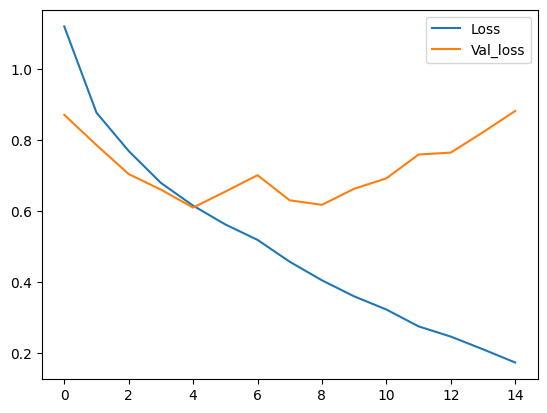

In [38]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

En ambas figuras se ve que pasadas las primeras 4 épocas, sólo estamos consiguiendo es hacer overfitting y más superadas las 10 épocas en la que incluso sube el error de validación y el de train sigue bajando


### Ejercicio 8

Evalua el modelo con los datos de test, además muestra el report de clasificación y la matriz de confusión.



In [32]:
resultados = model.evaluate(X_test, y_test_num)
print(f"Obtenemos un accuracy del {round(resultados[1]*100,2)}%")

94/94 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.7697
Obtenemos un accuracy del 76.97%


Mostramos el *classification report*

In [33]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 [==============================] - 0s 3ms/step


In [35]:
# Invertimos la clave y el valor de cada elemento del diccionario
inverse_map = {valor:clave for clave,valor in mapeo.items()}

#Creamos las listas para el classification report y la matriz de confusión
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]

#mostramos el classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.71      0.68      0.69       437
      forest       0.96      0.86      0.91       474
     glacier       0.77      0.73      0.75       553
    mountain       0.72      0.77      0.74       525
         sea       0.77      0.71      0.74       510
      street       0.72      0.86      0.79       501

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



Mostramos la matriz de confusión

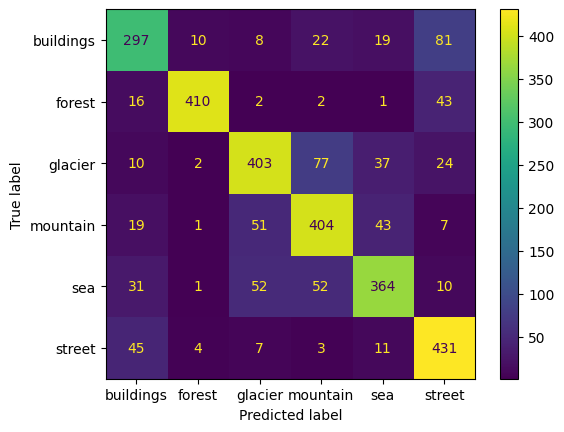

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels);

Los glaciares se confunden principalmente con montañas. El mar también se confunde más con glaciares y con montañas

El mejor clasificado son los bosques y las calles. Los edificios tampoco se clasifican bien y como era de esperar se confunden con las calles


### Ejercicio 9 

Representa algunos de los paisajes donde el modelo comete errores y muestra la confianza que tenía en ellos.





In [37]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

94/94 [==============================] - 0s 3ms/step


In [38]:
# Creamos el DataFrame
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

# Nos quedamos con los errores
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
2959,street,buildings,0.998482
434,buildings,street,0.998283
2805,street,forest,0.997967
1294,glacier,sea,0.997499
1386,glacier,mountain,0.995297
...,...,...,...
441,forest,street,0.307750
1097,glacier,sea,0.300726
687,forest,buildings,0.297123
2229,sea,street,0.292733


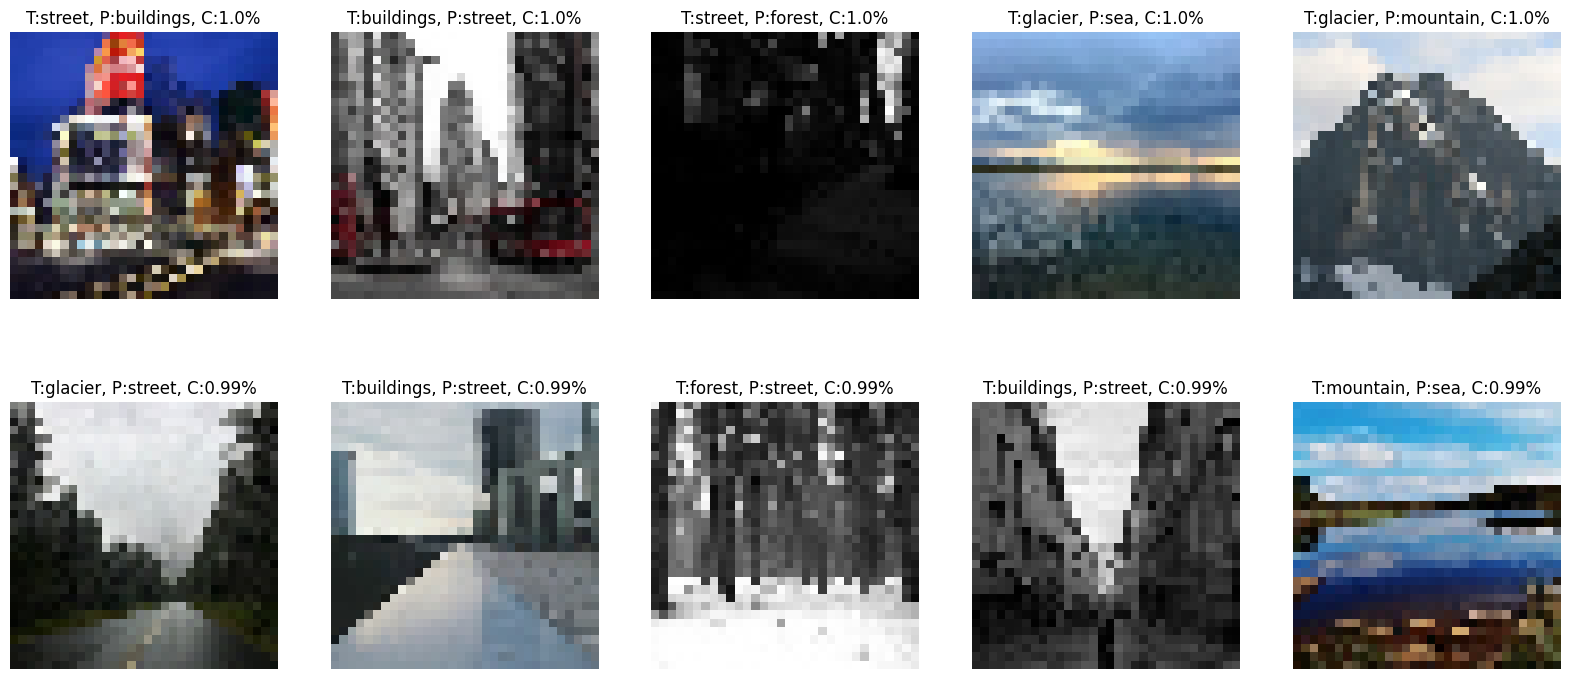

In [39]:
show_images_batch(X_test[errores.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], size_scale= 4)

### Ejercicio EXTRA: 

Aumenta la resolución y repite el ejercicio con la misma topología de red

In [40]:
X_train,y_train = read_data(TRAIN_PATH, (64,64))
X_test, y_test = read_data(TEST_PATH, (64,64))

buildings
forest
glacier
mountain
sea
street
buildings
forest
glacier
mountain
sea
street


Visualizamos las imágenes

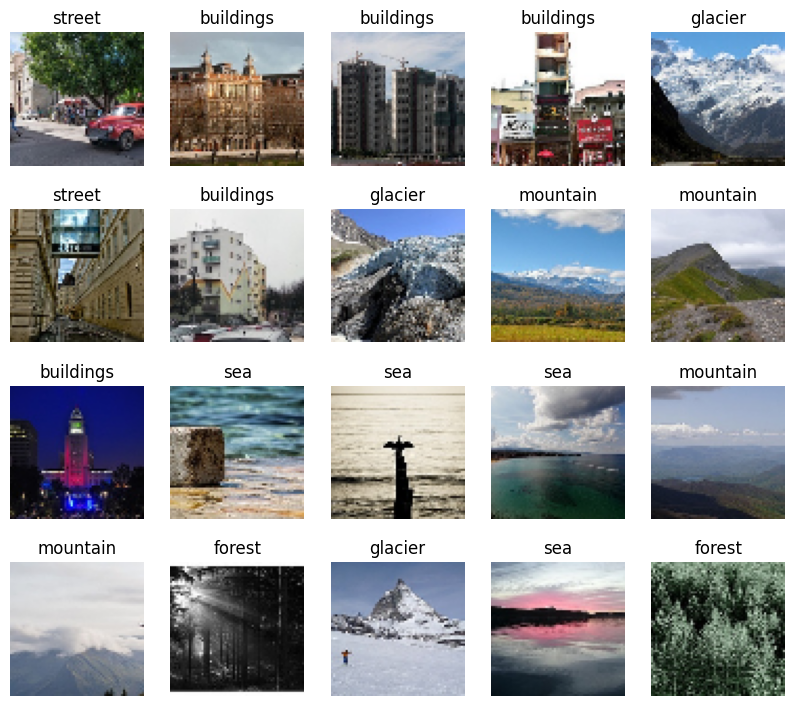

In [41]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

Convertimos el *target* a ordinal

In [42]:
y_train_num = np.array([mapeo[y] for y in y_train])
y_test_num = np.array([mapeo[y] for y in y_test])

Hacemos el *shuffle*

In [43]:
X_train, y_train_num = shuffle(X_train, y_train_num)

Creamos el modelo

In [46]:
# Creamos el modelo
model = keras.Sequential()

# Primera capa convolucional y su pooling
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (X_train[0].shape), padding = "same", activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Segunda capa convolucional y su pooling
model.add(keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
model.add(keras.layers.Flatten())

# Primera capa densa
model.add(keras.layers.Dense(units = 300, activation = 'relu'))

# Segunda capa densa
model.add(keras.layers.Dense(units = 100, activation = 'relu'))

# Capa de salida con 6 neuronas, una por cada clase
model.add(keras.layers.Dense(6, activation = 'softmax'))

# Creamos el compilador
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# Miramos el modelo creado
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 300)              

Entrenamos el modelo

In [47]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 64, callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)])

Epoch 1/100
176/176 [==============================] - 10s 55ms/step - loss: 3.3051 - accuracy: 0.4541 - val_loss: 1.1401 - val_accuracy: 0.5661
Epoch 2/100
176/176 [==============================] - 10s 57ms/step - loss: 0.9752 - accuracy: 0.6246 - val_loss: 1.0817 - val_accuracy: 0.5860
Epoch 3/100
176/176 [==============================] - 9s 53ms/step - loss: 0.7627 - accuracy: 0.7046 - val_loss: 1.1226 - val_accuracy: 0.6014
Epoch 4/100
176/176 [==============================] - 10s 54ms/step - loss: 0.6035 - accuracy: 0.7718 - val_loss: 1.1622 - val_accuracy: 0.6185
Epoch 5/100
176/176 [==============================] - 9s 54ms/step - loss: 0.4386 - accuracy: 0.8355 - val_loss: 1.2633 - val_accuracy: 0.6177
Epoch 6/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3392 - accuracy: 0.8767 - val_loss: 1.4768 - val_accuracy: 0.6142
Epoch 7/100
176/176 [==============================] - 9s 49ms/step - loss: 0.2767 - accuracy: 0.9034 - val_loss: 1.5473 - val_accura

Evaluamos contra test

In [48]:
resultados = model.evaluate(X_test, y_test_num)
print(f"Obtenemos un accuracy del {round(resultados[1]*100,2)}%")

94/94 [==============================] - 1s 11ms/step - loss: 1.0835 - accuracy: 0.5733
Obtenemos un accuracy del 57.33%


A pesar de haber aumentado la resolución obtenemos peor resultado. Habría que seguir ajustando hiperparámetros o hacer la red mas profunda

Mostramos el *classification report*

In [49]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 [==============================] - 1s 11ms/step


In [50]:
inverse_map = {valor:clave for clave,valor in mapeo.items()}

y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.60      0.50      0.55       437
      forest       0.90      0.69      0.78       474
     glacier       0.49      0.67      0.57       553
    mountain       0.55      0.54      0.55       525
         sea       0.45      0.23      0.30       510
      street       0.55      0.80      0.65       501

    accuracy                           0.57      3000
   macro avg       0.59      0.57      0.57      3000
weighted avg       0.58      0.57      0.56      3000



Vemos la confianza de las clases mal etiquetadas

In [52]:
confianza = [prediction.max() for prediction in model.predict(X_test)]
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

94/94 [==============================] - 1s 10ms/step


,True,Predicted,Confianza
2015,sea,buildings,0.997387
2748,street,buildings,0.994728
351,buildings,street,0.992301
478,forest,street,0.982838
179,buildings,street,0.982380
...,...,...,...
2627,street,mountain,0.227062
2014,sea,buildings,0.224507
2087,sea,mountain,0.221774
1840,mountain,sea,0.221542


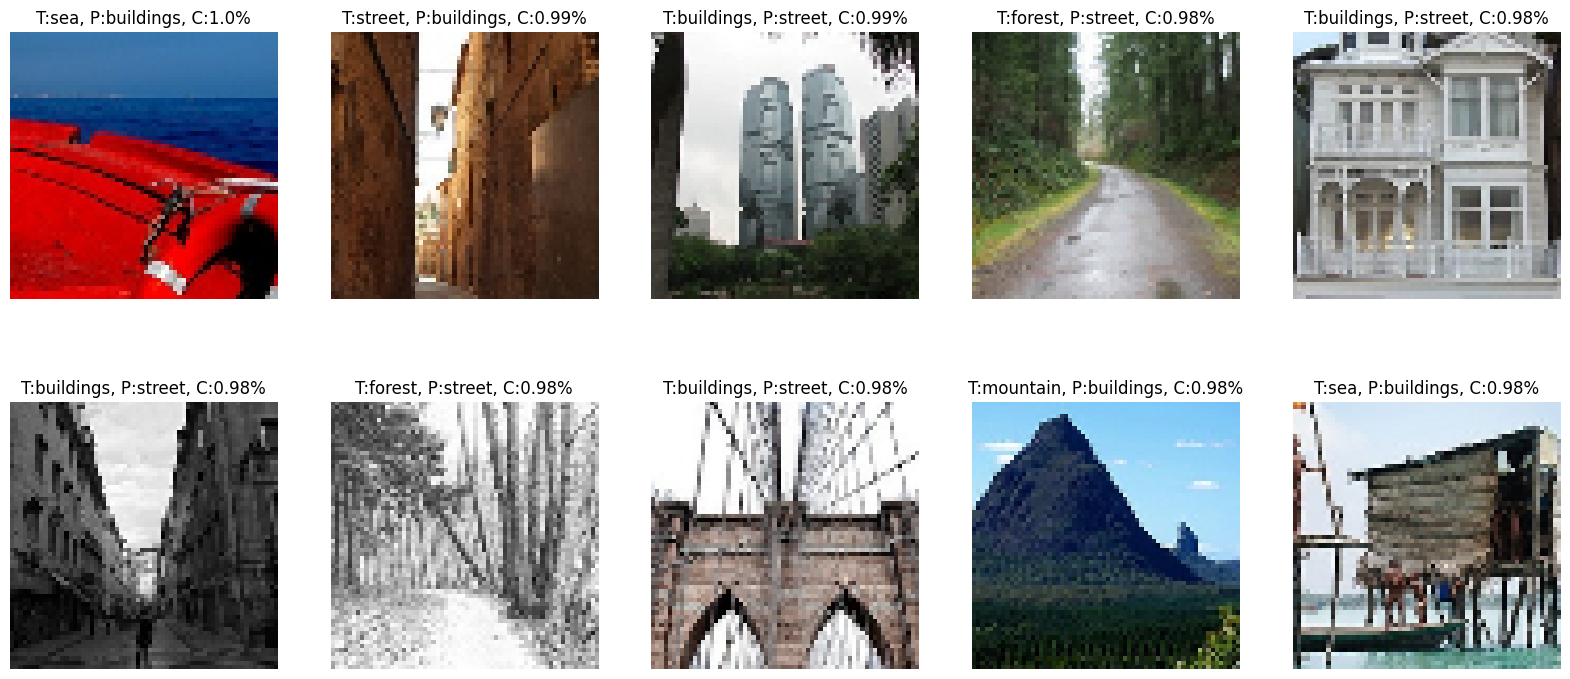

In [53]:
show_images_batch(X_test[errores.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], size_scale= 4)